#### This notebook calculates the bayesian integration of individual weights without considering any prior

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import Functional_Fusion.dataset as fdata
import glob
import matplotlib.pyplot as plt
from cortico_cereb_connectivity.scripts.script_train_eval_models import *
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [2]:
eval_models(train_dataset="MDTB", train_ses="ses-s1",
            eval_dataset=['MDTB'], eval_ses="ses-s2",
            eval_id='bayes_no_prior_vox', model='bayes_vox', ext_list=[8])

- getting weights for sub-02
- getting weights for sub-03
- getting weights for sub-04
- getting weights for sub-06
- getting weights for sub-08
- getting weights for sub-09
- getting weights for sub-10
- getting weights for sub-12
- getting weights for sub-14
- getting weights for sub-15
- getting weights for sub-17
- getting weights for sub-18
- getting weights for sub-19
- getting weights for sub-20
- getting weights for sub-21
- getting weights for sub-22
- getting weights for sub-24
- getting weights for sub-25
- getting weights for sub-26
- getting weights for sub-27
- getting weights for sub-28
- getting weights for sub-29
- getting weights for sub-30
- getting weights for sub-31
Reading sub-02 weight variance...
Reading sub-03 weight variance...
Reading sub-04 weight variance...
Reading sub-06 weight variance...
Reading sub-08 weight variance...
Reading sub-09 weight variance...
Reading sub-10 weight variance...
Reading sub-12 weight variance...
Reading sub-14 weight variance..

(   eval_subj  num_regions train_dataset train_ses train_type cerebellum  \
 0     sub-02         1876          MDTB    ses-s1   CondHalf      SUIT3   
 1     sub-03         1876          MDTB    ses-s1   CondHalf      SUIT3   
 2     sub-04         1876          MDTB    ses-s1   CondHalf      SUIT3   
 3     sub-06         1876          MDTB    ses-s1   CondHalf      SUIT3   
 4     sub-08         1876          MDTB    ses-s1   CondHalf      SUIT3   
 5     sub-09         1876          MDTB    ses-s1   CondHalf      SUIT3   
 6     sub-10         1876          MDTB    ses-s1   CondHalf      SUIT3   
 7     sub-12         1876          MDTB    ses-s1   CondHalf      SUIT3   
 8     sub-14         1876          MDTB    ses-s1   CondHalf      SUIT3   
 9     sub-15         1876          MDTB    ses-s1   CondHalf      SUIT3   
 10    sub-17         1876          MDTB    ses-s1   CondHalf      SUIT3   
 11    sub-18         1876          MDTB    ses-s1   CondHalf      SUIT3   
 12    sub-1

In [3]:
eval_models(train_dataset="MDTB", train_ses="ses-s1",
            eval_dataset=['MDTB'], eval_ses="ses-s2",
            eval_id='bayes_no_prior', model='bayes', ext_list=[8])

- getting weights for sub-02
- getting weights for sub-03
- getting weights for sub-04
- getting weights for sub-06
- getting weights for sub-08
- getting weights for sub-09
- getting weights for sub-10
- getting weights for sub-12
- getting weights for sub-14
- getting weights for sub-15
- getting weights for sub-17
- getting weights for sub-18
- getting weights for sub-19
- getting weights for sub-20
- getting weights for sub-21
- getting weights for sub-22
- getting weights for sub-24
- getting weights for sub-25
- getting weights for sub-26
- getting weights for sub-27
- getting weights for sub-28
- getting weights for sub-29
- getting weights for sub-30
- getting weights for sub-31
Reading sub-02 weight variance...
Reading sub-03 weight variance...
Reading sub-04 weight variance...
Reading sub-06 weight variance...
Reading sub-08 weight variance...
Reading sub-09 weight variance...
Reading sub-10 weight variance...
Reading sub-12 weight variance...
Reading sub-14 weight variance..

(   eval_subj  num_regions train_dataset train_ses train_type cerebellum  \
 0     sub-02         1876          MDTB    ses-s1   CondHalf      SUIT3   
 1     sub-03         1876          MDTB    ses-s1   CondHalf      SUIT3   
 2     sub-04         1876          MDTB    ses-s1   CondHalf      SUIT3   
 3     sub-06         1876          MDTB    ses-s1   CondHalf      SUIT3   
 4     sub-08         1876          MDTB    ses-s1   CondHalf      SUIT3   
 5     sub-09         1876          MDTB    ses-s1   CondHalf      SUIT3   
 6     sub-10         1876          MDTB    ses-s1   CondHalf      SUIT3   
 7     sub-12         1876          MDTB    ses-s1   CondHalf      SUIT3   
 8     sub-14         1876          MDTB    ses-s1   CondHalf      SUIT3   
 9     sub-15         1876          MDTB    ses-s1   CondHalf      SUIT3   
 10    sub-17         1876          MDTB    ses-s1   CondHalf      SUIT3   
 11    sub-18         1876          MDTB    ses-s1   CondHalf      SUIT3   
 12    sub-1

In [4]:
df_bayes=rm.comb_eval(models=['bayes_no_prior'], eval_data=['MDTBs2'])
df_bayes['model_type'] = df_bayes['model']
df_bayes_vox=rm.comb_eval(models=['bayes_no_prior_vox'], eval_data=['MDTBs2'])
df_bayes_vox['model_type'] = df_bayes_vox['model']

df_mix=rm.comb_eval(models=['mix-all-scale'], eval_data=['MDTBs2'])
df_mix['model_type'] = 'mix'

df2=rm.comb_eval(models=['Mds1-ind-scale','MDs1-loo-scale','MDs1-avg-scale'],eval_data=['MDTBs2'])
df2['model_type'] = df2['model']
df2.loc[df2['model'].isna() & (df2.subj_id != df2.eval_subj),'model_type']='diff'
df2.loc[df2['model'].isna() & (df2.subj_id == df2.eval_subj),'model_type']='same'

avg mean performance:  0.3482
bayes mean performance:  0.3193
bayes_vox mean performance:  0.3112
diff mean performance:  0.1568
loo mean performance:  0.3229
same mean performance:  0.3703


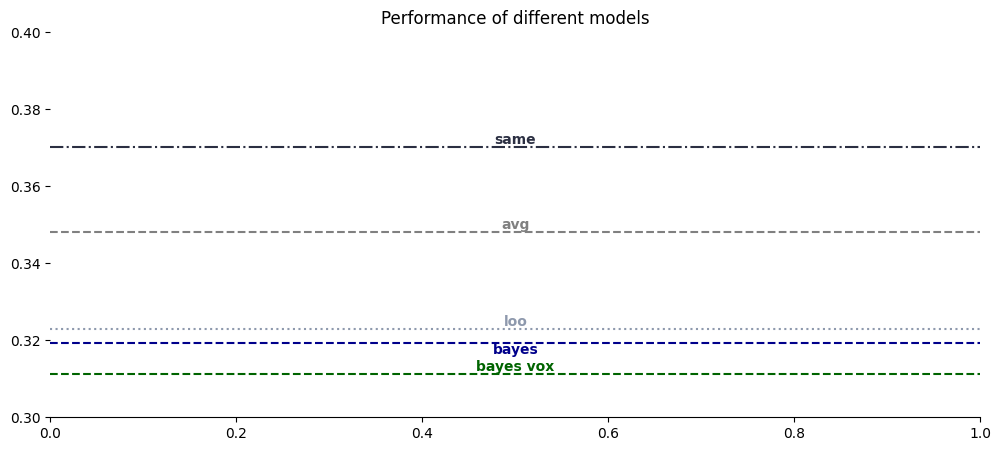

In [22]:
colors = ["#EF233C", "#2B2F42", "gray", "#8E99AD"]

all_dataframe = pd.concat([df_bayes, df_bayes_vox, df2])
# plotting the mixed model performance
fig, ax = plt.subplots(figsize=(12,5))
# ax = sns.lineplot(data=df_mix,x='mix_param',y='R_eval',errorbar='se',marker='o',color=colors[0])

# plotting the horizontal lines for comparison
ax.axhline(y=all_dataframe[all_dataframe['model_type']=='same']['R_eval'].mean(), color=colors[1], linestyle='-.', label='same')
ax.axhline(y=all_dataframe[all_dataframe['model_type']=='avg']['R_eval'].mean(), color=colors[2], linestyle='--', label='avg')
ax.axhline(y=all_dataframe[all_dataframe['model_type']=='loo']['R_eval'].mean(), color=colors[3], linestyle=':', label='loo')
ax.axhline(y=all_dataframe[all_dataframe['model_type']=='bayes']['R_eval'].mean(), color='darkblue', linestyle='--', label='bayes')
ax.axhline(y=all_dataframe[all_dataframe['model_type']=='bayes_vox']['R_eval'].mean(), color='darkgreen', linestyle='--', label='bayes vox')

# decoration
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.text(x=0.5,y=all_dataframe[all_dataframe['model_type']=='same']['R_eval'].mean(),s='same',color=colors[1],fontweight='bold',ha='center',va='bottom')
ax.text(x=0.5,y=all_dataframe[all_dataframe['model_type']=='avg']['R_eval'].mean(),s='avg',color=colors[2],fontweight='bold',ha='center',va='bottom')
ax.text(x=0.5,y=all_dataframe[all_dataframe['model_type']=='loo']['R_eval'].mean(),s='loo',color=colors[3],fontweight='bold',ha='center',va='bottom')
ax.text(x=0.5,y=all_dataframe[all_dataframe['model_type']=='bayes']['R_eval'].mean(),s='bayes',color='darkblue',fontweight='bold',ha='center',va='top')
ax.text(x=0.5,y=all_dataframe[all_dataframe['model_type']=='bayes_vox']['R_eval'].mean(),s='bayes vox',color='darkgreen',fontweight='bold',ha='center',va='bottom')
ax.set_title('Performance of different models') 
ax.set_ylim(0.3, 0.4)

for model in np.unique(all_dataframe['model_type']):
    print(f'{model} mean performance: {all_dataframe[all_dataframe["model_type"]==model]["R_eval"].mean(): .4f}')

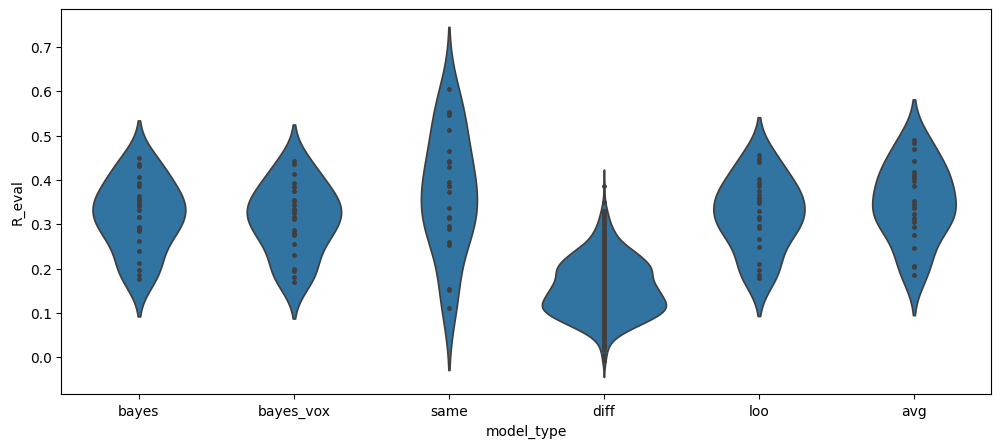

In [25]:
plt.figure(figsize=(12,5))
ax = sns.violinplot(data=all_dataframe, x=all_dataframe['model_type'], y=all_dataframe['R_eval'], inner='point')